In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from optbinning import ContinuousOptimalBinning ### POTREBBE DARE PROBLEMI SU WINDOWS !!!!
import statistics
import scipy.stats

mpl.rc("figure", figsize=(15, 15))

In [2]:
df = pd.read_csv('https://github.com/N0name99/Compitino/raw/main/compitino_dataviz_2021_2022.csv')

In [3]:
df.dtypes

nome_modulistica      object
score_preop          float64
score_postop         float64
condizioni_meteo      object
sesso                 object
anni_ricovero          int64
temperatura_media    float64
umidita_media        float64
HI > 27                 bool
natural_light           bool
dtype: object

In [4]:
df["HI > 27"] = df["HI > 27"].astype("category")
df["natural_light"] = df["natural_light"].astype("category")

# Creo l'attributo scarto, differenza tra SCORE_POST_OPERAZIONE e SCORE_PRE_OPERAZIONE

In [5]:
df['scarto_post_pre'] = df['score_postop']-df['score_preop']
df.head()


df['prova']= df['nome_modulistica'] == 'SF12 MentalScore' #Colonna ---> { TRUE : SCORE_MENTALE } ---- { FALSE : SCORE_FISICO }
df["prova"] = df["prova"].astype("category")
df.head()

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,scarto_post_pre,prova
0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True,9.8,False
1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True,4.1,True
2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True,10.1,False
3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True,7.6,True
4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True,24.1,False


# OPTIMAL GROUPING 
per variabile **condizioni_meteo**



In [6]:
df['condizioni_meteo'].value_counts()

poco nuvoloso                       668
sereno                              434
pioggia e schiarite                 350
nebbia al mattino                   302
sole e caldo                         98
pioggia debole                       94
nubi sparse                          70
temporale e schiarite                36
nebbia                               14
pioggia                              14
coperto                              10
neve                                  8
neve e schiarite                      8
neve debole                           2
pioggia mista a neve e schiarite      2
Name: condizioni_meteo, dtype: int64

In [7]:
grouping_meteo_list = []

for itext in df['condizioni_meteo']:
    if ((itext == 'poco nuvoloso') or (itext == 'nubi sparse')):
        grouping_meteo_list.append('Poco nuvoloso')
    elif (itext == 'pioggia debole') or (itext == 'pioggia e schiarite') or (itext == 'coperto'):
        grouping_meteo_list.append('Pioggia debole')
    elif (itext == 'neve e schiarite') or (itext == 'neve debole') or (itext == 'pioggia mista a neve e schiarite'):
        grouping_meteo_list.append('Neve debole')
    elif (itext == 'nebbia al mattino') or (itext == 'nebbia'):
        grouping_meteo_list.append('Nebbia')    
    elif (itext == 'temporale e schiarite') or (itext == 'pioggia'):
        grouping_meteo_list.append('Pioggia')
    elif (itext == 'sereno'):
        grouping_meteo_list.append("Sereno") 
    elif (itext == 'sole e caldo'):
        grouping_meteo_list.append("Sole e caldo")
    elif (itext == 'neve'):
        grouping_meteo_list.append("Neve")

df['meteo_grouping'] = grouping_meteo_list   

In [8]:
#Creo variabile grouping_METEO_numeric per parallel plot
grouping_meteo_list_num=[]
for itext in df['meteo_grouping']:
    if ((itext == 'Poco nuvoloso')):
        grouping_meteo_list_num.append("1")
    elif (itext == 'Pioggia debole'):
        grouping_meteo_list_num.append('2')
    elif (itext == 'Neve debole'):
        grouping_meteo_list_num.append('3')
    elif (itext == 'Nebbia'):
        grouping_meteo_list_num.append('4')    
    elif (itext == 'Pioggia'):
        grouping_meteo_list_num.append('5')
    elif (itext == 'Sereno'):
        grouping_meteo_list_num.append("6") 
    elif (itext == 'Sole e caldo'):
        grouping_meteo_list_num.append("7")
    elif (itext == 'Neve'):
        grouping_meteo_list_num.append("8")

df['meteo_grouping_numeric'] = grouping_meteo_list_num  
#Convert column to integer
df['meteo_grouping_numeric'] = df['meteo_grouping_numeric'].astype(int)
df.dtypes

nome_modulistica            object
score_preop                float64
score_postop               float64
condizioni_meteo            object
sesso                       object
anni_ricovero                int64
temperatura_media          float64
umidita_media              float64
HI > 27                   category
natural_light             category
scarto_post_pre            float64
prova                     category
meteo_grouping              object
meteo_grouping_numeric       int64
dtype: object

# **DESCRIPTIVE ANALYSIS**




In [9]:
df.describe()

,score_preop,score_postop,anni_ricovero,temperatura_media,umidita_media,scarto_post_pre,meteo_grouping_numeric
count,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000
mean,40.974938,47.246692,68.265403,12.476777,72.294787,6.271754,3.104265
std,13.051409,10.800011,10.777709,8.040272,16.170832,12.372607,2.130527
min,12.900000,16.210000,24.000000,-5.000000,23.000000,-37.700000,1.000000
25%,30.487500,38.285000,61.000000,6.000000,59.000000,-2.000000,1.000000
50%,39.010000,48.885000,69.000000,10.000000,72.000000,5.900000,2.000000
75%,51.060000,56.127500,76.000000,18.000000,86.000000,15.200000,6.000000
max,72.930000,68.340000,97.000000,31.000000,100.000000,45.900000,8.000000


**CORRELATION MATRIX**

In [10]:
df.corr()

,score_preop,score_postop,anni_ricovero,temperatura_media,umidita_media,scarto_post_pre,meteo_grouping_numeric
score_preop,1.000000,0.474966,-0.044021,-0.046543,-0.011607,-0.640267,-0.001687
score_postop,0.474966,1.000000,-0.051441,0.015235,-0.025134,0.371872,-0.007015
anni_ricovero,-0.044021,-0.051441,1.000000,-0.060085,0.044800,0.001533,0.025143
temperatura_media,-0.046543,0.015235,-0.060085,1.000000,-0.444016,0.062395,-0.020286
umidita_media,-0.011607,-0.025134,0.044800,-0.444016,1.000000,-0.009696,-0.239235
scarto_post_pre,-0.640267,0.371872,0.001533,0.062395,-0.009696,1.000000,-0.004344
meteo_grouping_numeric,-0.001687,-0.007015,0.025143,-0.020286,-0.239235,-0.004344,1.000000


# **Split del dataset in due dataset diversi**: 
**df_f** (dataset con solo osservazioni relative al fisical score) ; 
**df_m** (dataset con solo osservazioni relative al mental score)

In [11]:
df_p = df[df['nome_modulistica']=='SF12 PhysicalScore']#dataset score fisico
df_m = df[df['nome_modulistica']=='SF12 MentalScore']#dataset score mentale

# **OPTIMAL BINNING TEMPERATURA MEDIA**

In [12]:
#Valore minimo e massimo della distribuzione Temperatura Media
print(df_p['temperatura_media'].min(), df_p['temperatura_media'].max())

-5.0 31.0


In [13]:
#BINNING for TEMPERATURA MEDIA

x = df_p['temperatura_media'].values
y = df_p['scarto_post_pre'].values


optb = ContinuousOptimalBinning(name='temperatura_media', dtype="numerical")
optb.fit(x, y)

print(optb.status) #Verifica che il binning sia ottimale!

print(optb.splits) #Lista dei valori di Binning

OPTIMAL
[ 2.5  4.5  5.5  7.5 10.5 16.5 25.5]


### **Tabella di BINNING - Temperatura Media**

In [14]:
binning_table_temperatura = optb.binning_table

binning_table_temperatura.build()

,Bin,Count,Count (%),Sum,Std,Mean,Min,Max,Zeros count,WoE,IV
0,"(-inf, 2.50)",77,0.072986,807.6,12.548255,10.488312,-25.6,39.3,0,0.621866,0.045387
1,"[2.50, 4.50)",84,0.079621,806.0,10.274656,9.595238,-11.4,32.2,0,-0.271207,0.021594
2,"[4.50, 5.50)",66,0.062559,507.4,11.212703,7.687879,-14.2,33.3,1,-2.178567,0.136289
3,"[5.50, 7.50)",112,0.106161,992.2,9.644434,8.858929,-16.5,34.7,0,-1.007517,0.106959
4,"[7.50, 10.50)",205,0.194313,1861.7,10.715134,9.081463,-27.5,33.4,1,-0.784982,0.152532
5,"[10.50, 16.50)",199,0.188626,1835.8,10.606724,9.225126,-14.4,36.4,2,-0.64132,0.120969
6,"[16.50, 25.50)",217,0.205687,2494.3,10.765291,11.494470,-18.5,36.0,0,1.628025,0.334864
7,"[25.50, inf)",95,0.090047,1104.1,8.892909,11.622105,-8.8,32.5,0,1.75566,0.158093
8,Special,0,0.000000,0.0,NaN,0.000000,NaN,NaN,0,-9.866445,0.000000
9,Missing,0,0.000000,0.0,NaN,0.000000,NaN,NaN,0,-9.866445,0.000000


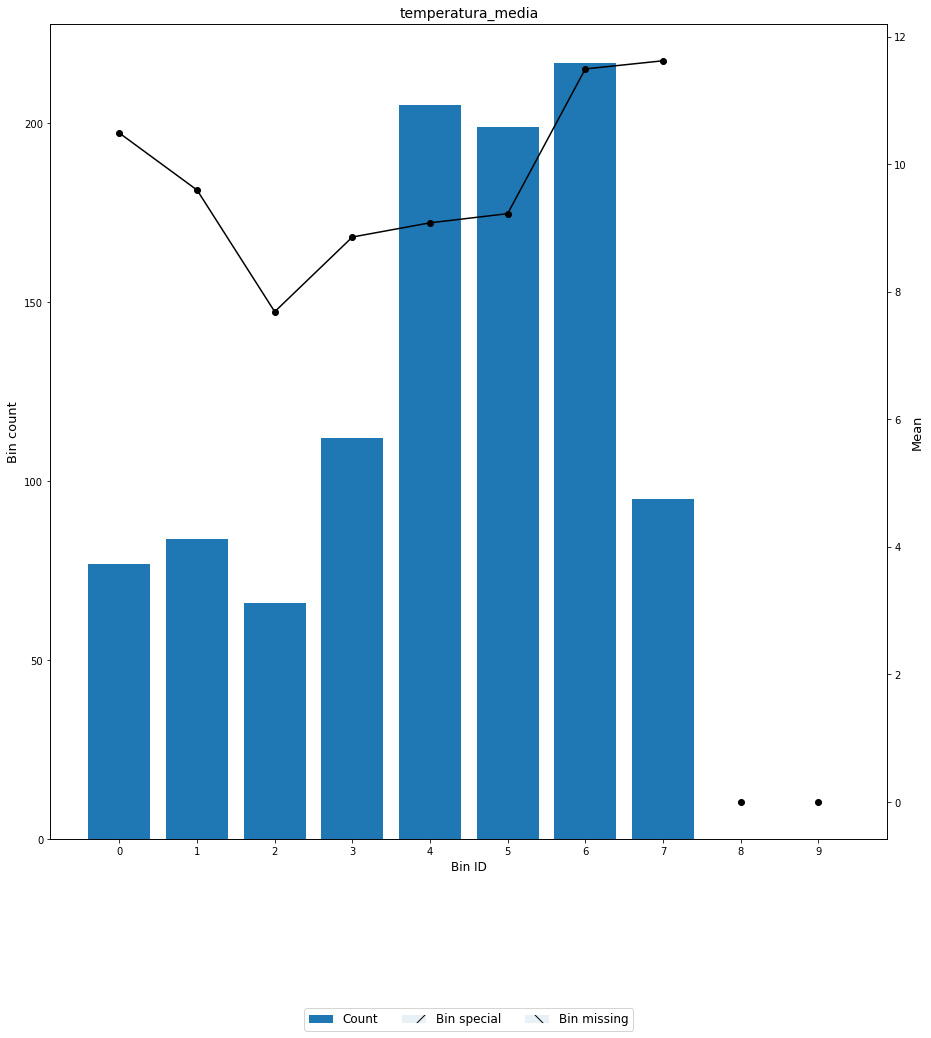

In [15]:
binning_table_temperatura.plot()

### **CREAZIONE features *TEMPERATURA_MEDIA_BINNING***

In [16]:
Temp_Phisycal_Binning = []
for temp in df_p['temperatura_media']:
    if temp < 2.5:
        Temp_Phisycal_Binning.append('11111111111111111')
    elif (temp >=2.5) and (temp < 4.5):
        Temp_Phisycal_Binning.append('22222222222222222')
    elif (temp >=4.5) and (temp < 5.5):
        Temp_Phisycal_Binning.append('33333333333333333')
    elif (temp >=5.5) and (temp < 7.5):
        Temp_Phisycal_Binning.append('44444444444444444')
    elif (temp >=7.5) and (temp < 10.5):
        Temp_Phisycal_Binning.append('55555555555555555')
    elif (temp >=10.5) and (temp < 16.5):
        Temp_Phisycal_Binning.append('66666666666666666')
    elif (temp >=16.5) and (temp < 25.5):
        Temp_Phisycal_Binning.append('77777777777777777')
    else:
        Temp_Phisycal_Binning.append('88888888888888888')



df_p['temperatura_media_binning'] = Temp_Phisycal_Binning
df_p['temperatura_media_binning'] = df_p['temperatura_media_binning'].astype('category')
print(df_p['temperatura_media_binning'].value_counts())


77777777777777777    217
55555555555555555    205
66666666666666666    199
44444444444444444    112
88888888888888888     95
22222222222222222     84
11111111111111111     77
33333333333333333     66
Name: temperatura_media_binning, dtype: int64


/var/folders/h2/xqc57vr15zn5p9tnpfdsgwt00000gn/T/ipykernel_21732/1607127983.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['temperatura_media_binning'] = Temp_Phisycal_Binning
/var/folders/h2/xqc57vr15zn5p9tnpfdsgwt00000gn/T/ipykernel_21732/1607127983.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['temperatura_media_binning'] = df_p['temperatura_media_binning'].astype('category')


# **SCATTER VIOLIN VISUALIZATION - TEMPERATURA MEDIA OPTIMAL BINNING** 

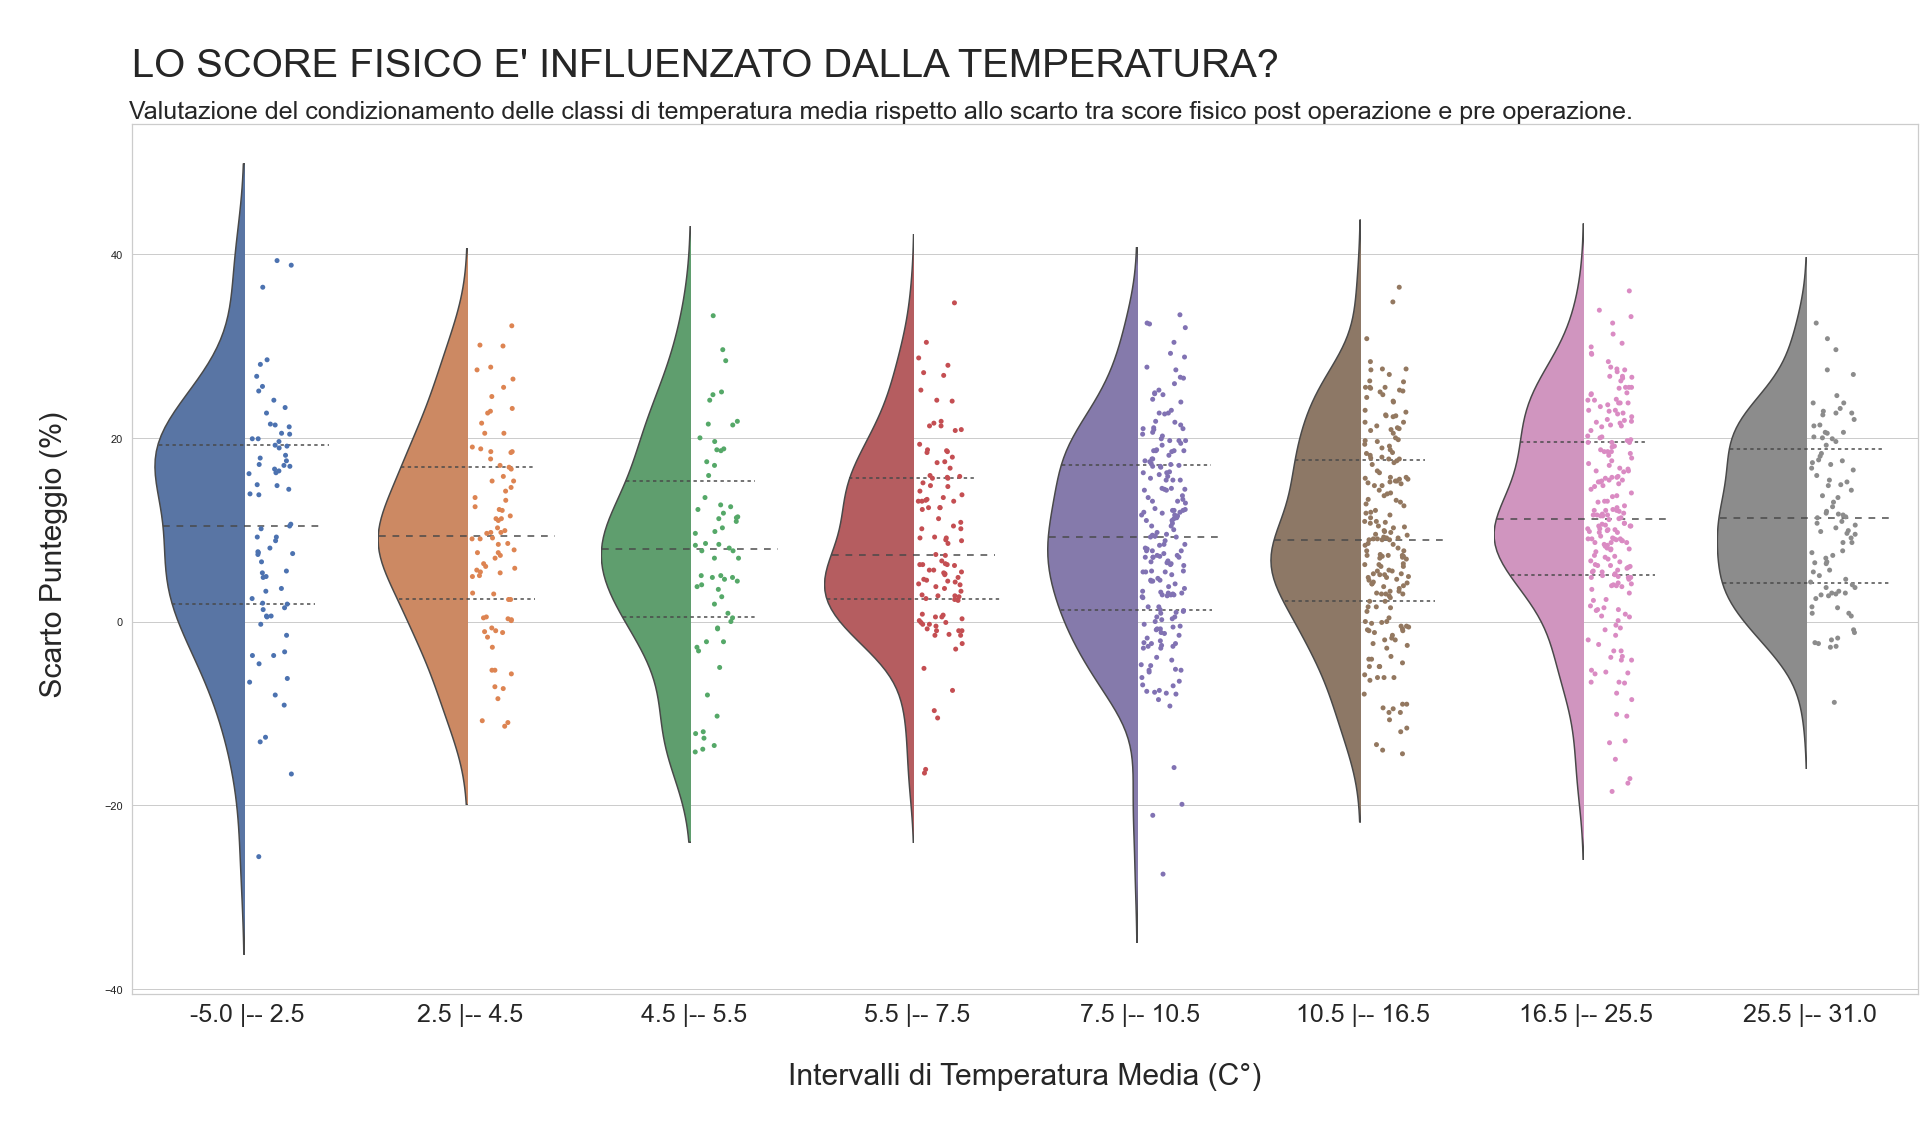

In [17]:
# Style
sns.set(style="whitegrid", palette="deep", color_codes=True)# Figure
fig, ax = plt.subplots(1, figsize=(32,16), facecolor='white')# Plot
ax = sns.violinplot(x="temperatura_media_binning", y="scarto_post_pre", data=df_p,
                    hue="temperatura_media_binning", dodge=False, inner='quart',
                    showmedians=True, scale="width")
plt.title("\nLO SCORE FISICO E' INFLUENZATO DALLA TEMPERATURA?\n", fontsize=40, loc='left')
plt.suptitle("Valutazione del condizionamento delle classi di temperatura media rispetto allo scarto tra score fisico post operazione e pre operazione.", fontsize=25, x=.45, y=.9)#, loc='left'
                
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

old_len_collections = len(ax.collections)
sns.stripplot(x="temperatura_media_binning", y="scarto_post_pre", data=df_p, hue="temperatura_media_binning", dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
# Labels
plt.ylabel('\n Scarto Punteggio (%)\n', fontsize=30)
plt.xlabel('\nIntervalli di Temperatura Media (C°)\n', fontsize=30)

xticks = plt.xticks()
xticks_labels = [' -5.0 |-- 2.5', 
                 ' 2.5 |-- 4.5', 
                 ' 4.5 |-- 5.5', 
                 ' 5.5 |-- 7.5', 
                 ' 7.5 |-- 10.5', 
                 ' 10.5 |-- 16.5', 
                 ' 16.5 |-- 25.5', 
                 ' 25.5 |-- 31.0']
plt.xticks(xticks[0], labels=xticks_labels, fontsize=25)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.get_legend().remove()
plt.show()
fig.savefig('3points.png', dpi=300)

# **RADIAL PLOT - CONDIZIONI METEO OPTIMAL GROUPING**

In [18]:
df.std()

/var/folders/h2/xqc57vr15zn5p9tnpfdsgwt00000gn/T/ipykernel_21732/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


score_preop               13.051409
score_postop              10.800011
anni_ricovero             10.777709
temperatura_media          8.040272
umidita_media             16.170832
scarto_post_pre           12.372607
meteo_grouping_numeric     2.130527
dtype: float64

/var/folders/h2/xqc57vr15zn5p9tnpfdsgwt00000gn/T/ipykernel_21732/2376594027.py:79: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(theta, mean_pre, "bo",color="green")
/var/folders/h2/xqc57vr15zn5p9tnpfdsgwt00000gn/T/ipykernel_21732/2376594027.py:80: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(theta, mean_post, "bo", color="dodgerblue")
/var/folders/h2/xqc57vr15zn5p9tnpfdsgwt00000gn/T/ipykernel_21732/2376594027.py:83: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "DPI" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Radial_Plot_Mental.png',bbox_inches="tight",DPI=300)


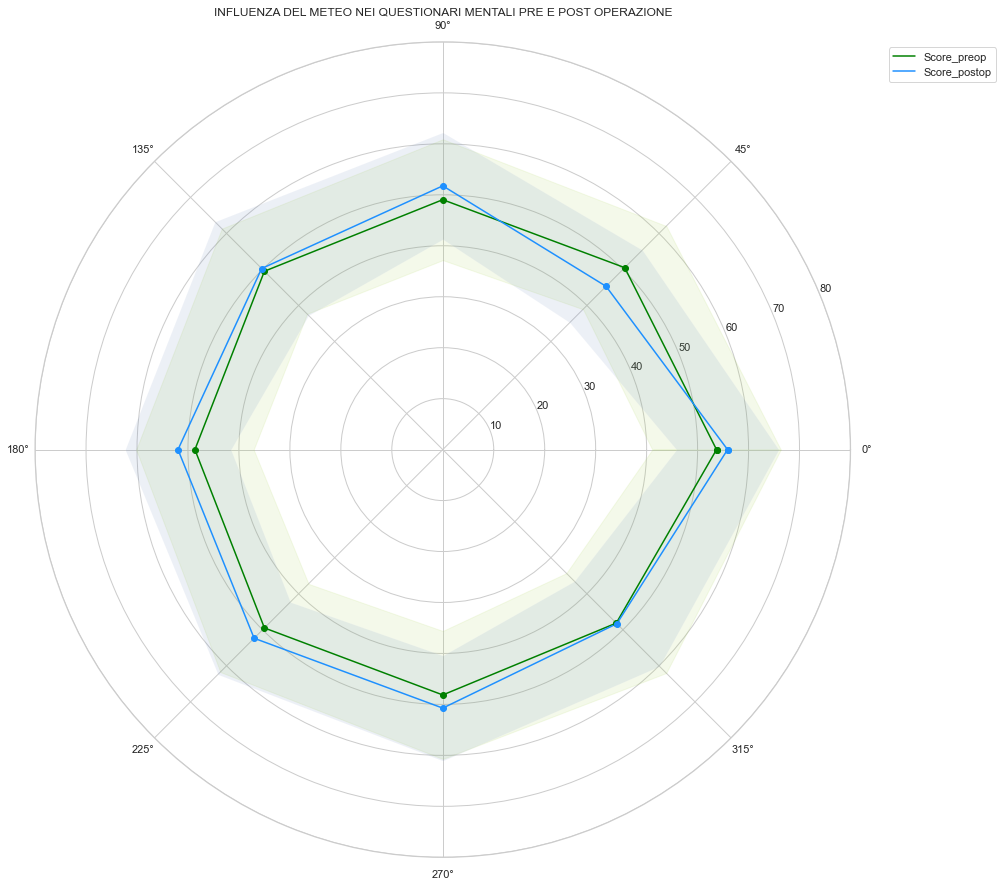

/var/folders/h2/xqc57vr15zn5p9tnpfdsgwt00000gn/T/ipykernel_21732/2376594027.py:153: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(theta, mean_pre, "bo",color="green")
/var/folders/h2/xqc57vr15zn5p9tnpfdsgwt00000gn/T/ipykernel_21732/2376594027.py:154: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(theta, mean_post, "bo", color="dodgerblue")
/var/folders/h2/xqc57vr15zn5p9tnpfdsgwt00000gn/T/ipykernel_21732/2376594027.py:157: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "DPI" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Radial_Plot_Phisical.png',bbox_inches="tight",DPI=300)


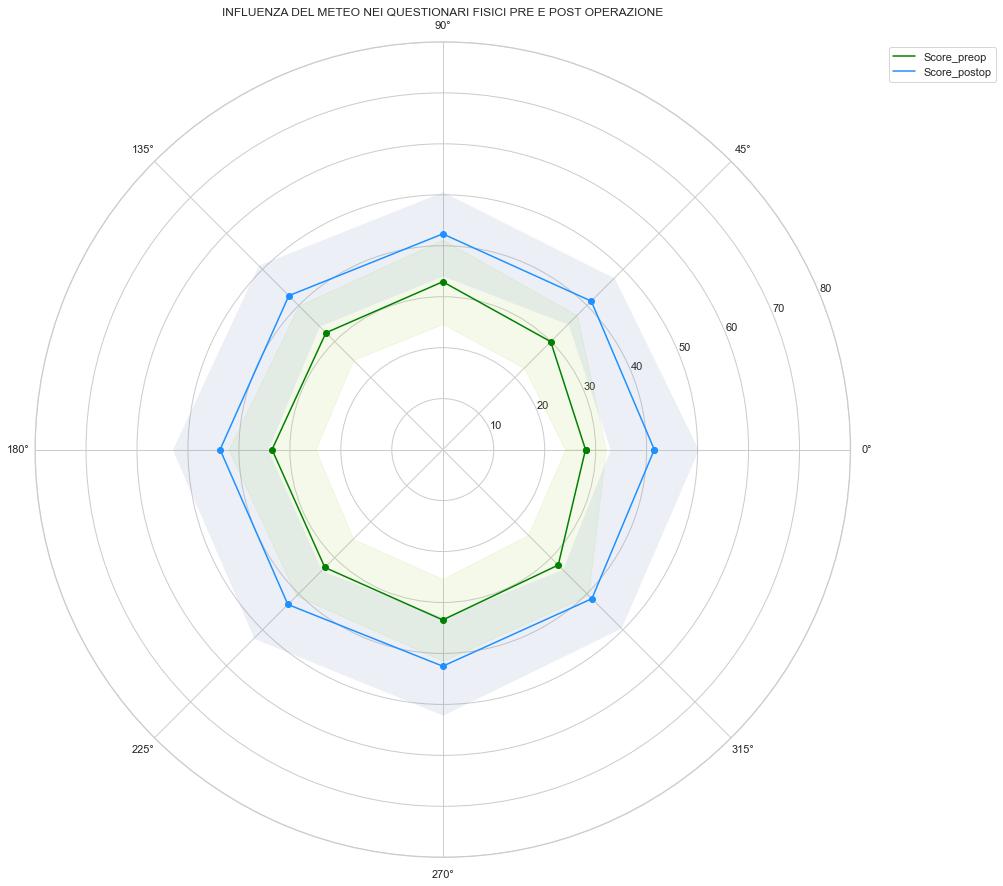

In [19]:
# function for rmse
def rmse(data):
    return abs(data - statistics.mean(data)).mean()

# function for confidence interval
def dispersion_interval(data):
    a = 1.0 * np.array(data)
    n = len(a)
    m, st_dev = np.mean(a), statistics.pstdev(a)
    return m, m-st_dev, m+st_dev

mean_pre = [] 
lower_pre = [] 
upper_pre = []

# sort df
df1 = df[df['nome_modulistica']=='SF12 MentalScore']
df1 = df1.groupby(['meteo_grouping'], as_index=False).mean()
df1['weigths'] = pd.Categorical([3,2,1,8,7,6,5,4])
df1 = df1.sort_values("weigths")


df2 = df[df['nome_modulistica']=='SF12 MentalScore']
for i in df1["meteo_grouping"]:
    d =  dispersion_interval(df2[df2["meteo_grouping"]==i]["score_preop"])
    mean_pre.append(d[0])
    lower_pre.append(d[1])
    upper_pre.append(d[2])

mean_pre.append(mean_pre[0])
lower_pre.append(lower_pre[0])
upper_pre.append(upper_pre[0])


# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(15,15))
ax1 = plt.axes(polar=True)
ax1.set_ylim(0,80)
 
# Arrange the grid into number of sales equal parts in degrees
theta = 2*np.pi/360 * np.array(list(range(0, 405, 45)))
# lines, labels = plt.thetagrids(range(0, 360, 45), (df1["meteo_grouping"]))

 
# Plot score_preop confidence graph
plt.fill_between(theta, lower_pre, upper_pre, alpha=0.1, color="yellowgreen")
 
mean_post = [] 
lower_post = [] 
upper_post = []

# sort df
df1 = df[df['nome_modulistica']=='SF12 MentalScore']
df1 = df1.groupby(['meteo_grouping'], as_index=False).mean()
df1['weigths'] = pd.Categorical([3,2,1,8,7,6,5,4])
df1 = df1.sort_values("weigths")

df2 = df[df['nome_modulistica']=='SF12 MentalScore']
for i in df1["meteo_grouping"]:
    d =  dispersion_interval(df2[df2["meteo_grouping"]==i]["score_postop"])
    mean_post.append(d[0])
    lower_post.append(d[1])
    upper_post.append(d[2])

mean_post.append(mean_post[0])
lower_post.append(lower_post[0])
upper_post.append(upper_post[0])

# Plot score_postop graph
plt.fill_between(theta, lower_post, upper_post, alpha=0.1)

# Plot score_preop and score_postop graph
plt.plot(theta, mean_pre, color="green")
plt.plot(theta, mean_post, color="dodgerblue")
plt.legend(labels=('Score_preop', 'Score_postop'), loc='upper left', bbox_to_anchor=(1.04, 1))
plt.title("INFLUENZA DEL METEO NEI QUESTIONARI MENTALI PRE E POST OPERAZIONE")

# plot dots score_preop and score_postop
plt.plot(theta, mean_pre, "bo",color="green")
plt.plot(theta, mean_post, "bo", color="dodgerblue")
 
# Display the plot on the screen
plt.savefig('Radial_Plot_Mental.png',bbox_inches="tight",DPI=300)
plt.show()



mean_pre = [] 
lower_pre = [] 
upper_pre = []

# sort df
df1 = df[df['nome_modulistica']=='SF12 PhysicalScore']
df1 = df1.groupby(['meteo_grouping'], as_index=False).mean()
df1['weigths'] = pd.Categorical([3,2,1,8,7,6,5,4])
df1 = df1.sort_values("weigths")

df2 = df[df['nome_modulistica']=='SF12 PhysicalScore']
for i in df1["meteo_grouping"]:
    d =  dispersion_interval(df2[df2["meteo_grouping"]==i]["score_preop"])
    mean_pre.append(d[0])
    lower_pre.append(d[1])
    upper_pre.append(d[2])

mean_pre.append(mean_pre[0])
lower_pre.append(lower_pre[0])
upper_pre.append(upper_pre[0])

# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(15,15))
ax1 = plt.axes(polar=True)
ax1.set_ylim(0,80)
 
# Arrange the grid into number of sales equal parts in degrees
theta = 2*np.pi/360 * np.array(list(range(0, 405, 45)))
# lines, labels = plt.thetagrids(range(0, 360, 45), (df1["meteo_grouping"]))

 
# Plot score_preop confidence graph
plt.fill_between(theta, lower_pre, upper_pre, alpha=0.1, color="yellowgreen")
 
mean_post = [] 
lower_post = [] 
upper_post = []

# sort df
df1 = df[df['nome_modulistica']=='SF12 PhysicalScore']
df1 = df1.groupby(['meteo_grouping'], as_index=False).mean()
df1['weigths'] = pd.Categorical([3,2,1,8,7,6,5,4])
df1 = df1.sort_values("weigths")

df2 = df[df['nome_modulistica']=='SF12 PhysicalScore']
for i in df1["meteo_grouping"]:
    d =  dispersion_interval(df2[df2["meteo_grouping"]==i]["score_postop"])
    mean_post.append(d[0])
    lower_post.append(d[1])
    upper_post.append(d[2])

mean_post.append(mean_post[0])
lower_post.append(lower_post[0])
upper_post.append(upper_post[0])

# Plot score_postop graph
plt.fill_between(theta, lower_post, upper_post, alpha=0.1)

# Plot score_preop and score_postop graph
plt.plot(theta, mean_pre, color="green")
plt.plot(theta, mean_post, color="dodgerblue")
plt.legend(labels=('Score_preop', 'Score_postop'), loc='upper left', bbox_to_anchor=(1.04, 1))
plt.title("INFLUENZA DEL METEO NEI QUESTIONARI FISICI PRE E POST OPERAZIONE")

# plot dots score_preop and score_postop
plt.plot(theta, mean_pre, "bo",color="green")
plt.plot(theta, mean_post, "bo", color="dodgerblue")
 
# Display the plot on the screen
plt.savefig('Radial_Plot_Phisical.png',bbox_inches="tight",DPI=300)
plt.show()